# 1. Wire

In high-frequency communications, the resistance of a wire is not constant. As frequency increases, the current is forced to the outer surface of the conductor due to the **Skin Effect**.

## 1.1 Skin Depth ($\delta$)

The skin depth is the effective thickness of the layer where current flows. At high frequencies, the center of the conductor carries almost no current.

$$
\delta = \frac{1}{\sqrt{\pi f \mu \sigma}}
$$

## 1.2 AC Resistance ($R_{AC}$)

At high frequencies, current flows through a "hollow" ring of thickness $\delta$ and circumference $2\pi R$. The AC resistance can be expressed intuitively by using this effective area ($A_{eff}$):

$$
R_{AC} = \frac{L}{\sigma \cdot A_{eff}} 
= \frac{L}{\sigma \cdot (2\pi R \cdot \delta)}
$$

Where:

- $L$: Length of the wire [m]  
- $R$: Radius of the wire [m]  
- $\sigma$: Conductivity [S/m]  


## 1.3 Transition from DC to AC

At low frequencies, the resistance is the constant DC resistance:

$$
R_{DC} = \frac{L}{\sigma \cdot \pi R^2}
$$

As frequency increases and $\delta$ becomes smaller than $R$, the resistance begins to rise following the $\sqrt{f}$ relationship.

## 1.4 Self-Inductance of a Wire

The total self-inductance of a wire consists of external inductance (due to magnetic fields outside the conductor) and internal inductance (due to magnetic fields inside the conductor). For a straight wire, the total inductance can be approximated using the formula provided in the technical specifications:

$$
L = 0.002l\left[2.3 \log\left(\frac{4l}{d}\right) - 0.75\right] \, \mu\text{H}
$$

Where:

- $L$: Inductance in $\mu\text{H}$
- $l$: Length of the wire in cm
- $d$: Diameter of the wire in cm


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, FloatLogSlider, HBox, VBox, Layout, interactive_output
from IPython.display import display

def compare_wire_physics(L1, sigma1, R1, L2, sigma2, R2, L3, L4, f_curs, d_curs):
    mu_0 = 4 * np.pi * 1e-7
    freq = np.logspace(5, 10, 500)
    diam_cm_axis = np.linspace(0.01,0.2, 500) # 1mm to 20mm
    
    # --- Calculations ---
    def calc_r(L, sigma, R, f):
        delta = 1 / np.sqrt(np.pi * f * mu_0 * sigma)
        r_dc = L / (sigma * np.pi * R**2)
        r_ac = L / (sigma * (2 * np.pi * R * delta))
        return np.maximum(r_dc, r_ac)

    def calc_l_nH(l_cm, d_cm):
        # Eq 1-1: Result in uH converted to nH (*1000)
        uH = 0.002 * l_cm * (2.3 * np.log10((4 * l_cm) / d_cm) - 0.75)
        return uH * 1000

    # Curve Data
    res1 = calc_r(L1, sigma1, R1, freq)
    res2 = calc_r(L2, sigma2, R2, freq)
    ind1 = calc_l_nH(L3, diam_cm_axis)
    ind2 = calc_l_nH(L4, diam_cm_axis)

    # Cursor Intersection Points
    y_r1 = calc_r(L1, sigma1, R1, f_curs)
    y_r2 = calc_r(L2, sigma2, R2, f_curs)
    y_l1 = calc_l_nH(L3, d_curs)
    y_l2 = calc_l_nH(L4, d_curs)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    # --- Plot 1: Resistance ---
    ax1.loglog(freq, res1, lw=2, color='royalblue', label=fr'Case 1 ($L={L1}$m)')
    ax1.loglog(freq, res2, lw=2, color='darkorange', ls='--', label=fr'Case 2 ($L={L2}$m)')
    
    # Vertical Red Cursor for Resistance
    ax1.axvline(f_curs, color='red', lw=1.5, ls='-', alpha=0.8)
    ax1.scatter([f_curs, f_curs], [y_r1, y_r2], color='red', zorder=5)
    
    ax1.set_title(fr'AC Resistance | Cursor: {f_curs:.1e} Hz' + '\n' + 
                  fr'Rac1: {y_r1:.2f} $\Omega$ | Rac2: {y_r2:.2f} $\Omega$', fontsize=11)
    ax1.set_xlabel('Frequency (Hz)')
    ax1.set_ylabel(r'Resistance ($\Omega$)')
    ax1.grid(True, which="both", alpha=0.3)
    ax1.legend(loc='upper left')

    # --- Plot 2: Inductance ---
    ax2.plot(diam_cm_axis, ind1, lw=2, color='royalblue', label=fr'Case 1 ($l={L3:.2f}$cm)')
    ax2.plot(diam_cm_axis, ind2, lw=2, color='darkorange', ls='--', label=fr'Case 2 ($l={L4:.2f}$cm)')
    
    # Vertical Red Cursor for Inductance
    ax2.axvline(d_curs, color='red', lw=1.5, ls='-', alpha=0.8)
    ax2.scatter([d_curs, d_curs], [y_l1, y_l2], color='red', zorder=5)
    
    ax2.set_title(f'Inductance (nH) | Cursor: {d_curs:.2f} cm' + '\n' + 
                  f'L1: {y_l1:.1f} nH | L2: {y_l2:.1f} nH', fontsize=11)
    ax2.set_xlabel('Diameter (cm)')
    ax2.set_ylabel('Inductance (nH)')
    ax2.grid(True, alpha=0.3)
    ax2.legend(loc='upper right')

    plt.tight_layout()
    plt.show()

# --- UI Layout ---
style = {'description_width': 'initial'}
wid = Layout(width='280px')

# Case 1 Parameters
L1_s = FloatSlider(value=100, min=1, max=500, step=1, description='L1 (m)', style=style, layout=wid)
s1_s = FloatLogSlider(value=5.98e7, base=10, min=4, max=8, step=0.1, description=r'$\sigma_1$ (S/m)', style=style, layout=wid)
R1_s = FloatSlider(value=0.0005, min=0.0001, max=0.005, step=0.0001, description='R1 (m)', readout_format='.4f', style=style, layout=wid)

# Case 2 Parameters
L2_s = FloatSlider(value=100, min=1, max=500, step=1, description='L2 (m)', style=style, layout=wid)
s2_s = FloatLogSlider(value=1.03e7, base=10, min=4, max=8, step=0.1, description=r'$\sigma_2$ (S/m)', style=style, layout=wid)
R2_s = FloatSlider(value=0.0010, min=0.0001, max=0.005, step=0.0001, description='R2 (m)', readout_format='.4f', style=style, layout=wid)

# Inductance Lengths (cm)
L3_s = FloatSlider(value=5.0, min=1, max=100, step=0.1, description='L3 (cm)', style=style, layout=wid)
L4_s = FloatSlider(value=10.0, min=1, max=100, step=0.1, description='L4 (cm)', style=style, layout=wid)

# Red Axis Cursor Controls
f_curs_s = FloatLogSlider(value=1e7, base=10, min=5, max=10, step=0.1, description='Freq Cursor', style=style, layout=wid)
d_curs_s = FloatSlider(value=0.06, min=0.01, max=0.2, step=0.01, description='Diam Cursor', style=style, layout=wid)

# Organization
controls = HBox([
    VBox([L1_s, s1_s, R1_s, f_curs_s]), 
    VBox([L2_s, s2_s, R2_s, d_curs_s]), 
    VBox([L3_s, L4_s])
])

out = interactive_output(compare_wire_physics, {
    'L1': L1_s, 'sigma1': s1_s, 'R1': R1_s, 'L2': L2_s, 'sigma2': s2_s, 'R2': R2_s, 
    'L3': L3_s, 'L4': L4_s, 'f_curs': f_curs_s, 'd_curs': d_curs_s
})

display(VBox([controls, out]))

# 2. Wirebound Resistor

Every physical resistor has "parasitics"—unintended electrical behaviors caused by its geometry. Your notebook models a **Parallel Resonant Circuit** based on these three components:

- **Ideal Resistance ($R$)**: The nominal value of the resistor (e.g., $10\text{ k}\Omega$).
- **Series Inductance ($L$)**: This comes from the magnetic field generated by the current flowing through the length of the component and its leads. It can be calculated with the previous formula.
- **Parallel Capacitance ($C$)**: This occurs due to the electric field between the two ends of the resistor or between turns if it is a wire-wound type.

## 2.3. Resonance and Impedance Profile

The most critical part of your simulation is the **Self-Resonant Frequency (SRF)**.

- **Below Resonance ($X_L \ll R$)**: The impedance is dominated by $R$. The curve is flat.
- **Approaching Resonance**: The energy begins to oscillate between $L$ and $C$. In a parallel configuration, the reactances partially cancel out, causing the total impedance to increase toward a peak.
- **At Resonance ($f_{res}$)**: The impedance reaches its maximum value. This is the SRF.

  $$
  f_{res} = \frac{1}{2\pi\sqrt{LC}}
  $$

- **Above Resonance**: The parasitic capacitance becomes the path of least resistance ($X_C$ decreases as frequency increases). The "resistor" now acts like a capacitor, and the impedance drops sharply.



In [2]:
!pip install ipympl

interactive(children=(FloatSlider(value=10000.0, description='Res (Ω)', max=10000.0, min=100.0, step=10.0), Fl…

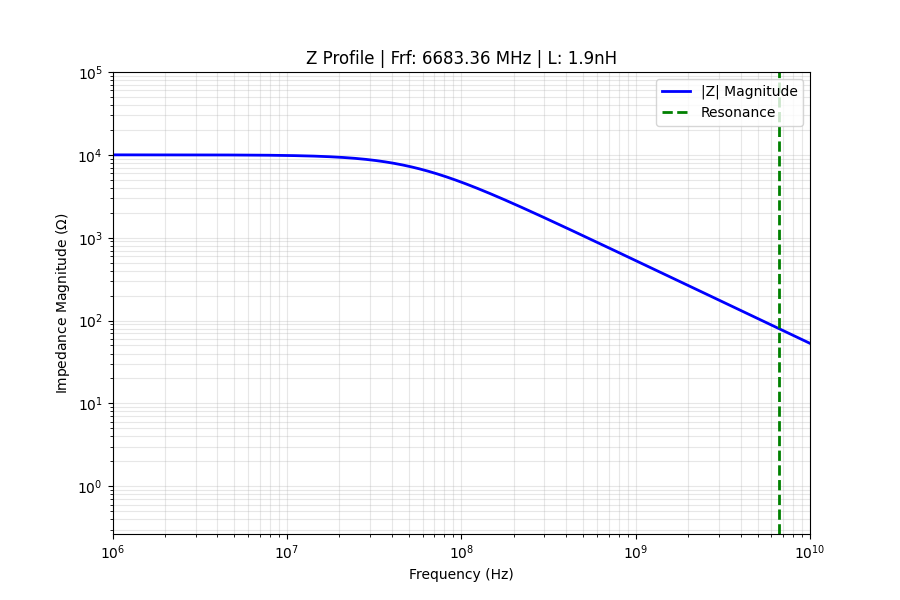

In [3]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets

# Close any existing figures to clear memory and the interface
plt.close('all')

# 1. Setup the figure and axis
fig, ax = plt.subplots(figsize=(9, 6))
line, = ax.loglog([], [], color='blue', lw=2, label='|Z| Magnitude')

# This line marks the calculated resonance. 
# Using transform=ax.get_xaxis_transform() ensures [0, 1] covers top to bottom.
res_line = ax.axvline(1, color='green', ls='--', lw=2, label='Resonance')

# Crosshair lines
v_line = ax.axvline(1, color='gray', lw=0.5, ls='-', visible=False)
h_line = ax.axhline(1, color='gray', lw=0.5, ls='-', visible=False)

text_box = ax.text(0.05, 0.95, '', transform=ax.transAxes, verticalalignment='top', 
                    bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

ax.grid(True, which="both", ls="-", alpha=0.3)
ax.set_ylabel(r'Impedance Magnitude $(\Omega)$')
ax.set_xlabel('Frequency (Hz)')
ax.legend(loc='upper right')

# Global data storage
freq_data = np.logspace(6, 12, 2500) 
mag_data = np.zeros_like(freq_data)

def update_plot(R_base, length_cm, diameter_cm, C_val_pF):
    global mag_data
    if diameter_cm <= 0 or C_val_pF <= 0: return
    
    # Unit Conversions
    C_val = C_val_pF * 1e-12
    omega = 2 * np.pi * freq_data
    
    # 2. Inductance calculation
    L_uH = 0.002 * length_cm * (np.log10((4 * length_cm) / diameter_cm) - 0.75)
    L_val = L_uH * 1e-6 
    L_nH = L_val * 1e9

    # 3. Impedance calculation
    Z_series = R_base + 1j * omega * L_val
    Z_cap = 1 / (1j * omega * C_val)
    Z_total = (Z_series * Z_cap) / (Z_series + Z_cap)
    mag_data = np.abs(Z_total)

    # 4. Update Visuals
    line.set_data(freq_data, mag_data)
    
    # Calculate resonance frequency in Hz
    f_res = 1 / (2 * np.pi * np.sqrt(L_val * C_val))
    
    # Update the vertical resonance line position
    res_line.set_xdata([f_res, f_res])
    
    # IMPORTANT: Keep line top-to-bottom by resetting Y limits for the vline
    res_line.set_ydata([0, 1]) 
    res_line.set_transform(ax.get_xaxis_transform())
    
    # Dynamic axis scaling
    ax.set_xlim(1e6, 1e10) 
    y_min = max(1e-1, np.min(mag_data)*0.5)
    y_max = max(1e5, np.max(mag_data)*2)
    ax.set_ylim(y_min, y_max)
    
    ax.set_title(f"Z Profile | Frf: {f_res/1e6:.2f} MHz | L: {L_nH:.1f}nH")
    fig.canvas.draw_idle()

# 5. Cursor Logic
def on_mouse_move(event):
    if event.inaxes == ax:
        log_event_x = np.log10(event.xdata)
        log_freq_data = np.log10(freq_data)
        idx = (np.abs(log_freq_data - log_event_x)).argmin()
        
        x_hz, y = freq_data[idx], mag_data[idx]
        x_mhz = x_hz / 1e6
        
        v_line.set_xdata([x_hz, x_hz])
        h_line.set_ydata([y, y])
        v_line.set_visible(True)
        h_line.set_visible(True)
        
        text_box.set_text(f'Freq: {x_mhz:.2f} MHz\n|Z|: {y:.2f} Ω')
        fig.canvas.draw_idle()
    else:
        v_line.set_visible(False)
        h_line.set_visible(False)

fig.canvas.mpl_connect('motion_notify_event', on_mouse_move)

# 6. Interactive Sliders
widgets.interact(update_plot, 
                 R_base=widgets.FloatSlider(value=10000, min=100, max=10000, step=10, description='Res (Ω)'),
                 length_cm=widgets.FloatSlider(value=1.27, min=0.01, max=10.0, step=0.01, description='Len (cm)'),
                 diameter_cm=widgets.FloatSlider(value=0.1628, min=0.01, max=2.0, step=0.01, description='Diam (cm)'),
                 C_val_pF=widgets.FloatSlider(value=0.3, min=0.01, max=10.0, step=0.1, description='Cap (pF)'))
plt.show()

# 3. Capacitor 
## 3.1 Capacitive Reactance ($X_C$)

This represents the opposition to alternating current due to the capacitor's ability to store charge. It is calculated as:

$$
X_C = \frac{1}{2\pi f C}
$$

As frequency ($f$) increases, the reactance decreases linearly on a log-log scale.

---

## 3.2 Equivalent Series Resistance (ESR)

This represents the losses within the capacitor, including lead resistance, dielectric losses, and resistance of the plates. It acts as a floor for the total impedance.

---

## 3.3 Total Impedance ($|Z|$)

The combination of the reactive and resistive parts:

$$
|Z| = \sqrt{ESR^2 + X_C^2}
$$

- At low frequencies, $X_C$ dominates.
- At high frequencies, ESR dominates.

---

## 3.4 Quality Factor ($Q$)

This indicates the efficiency of the capacitor. A higher $Q$ means lower energy loss.

$$
Q = \frac{X_C}{ESR}
$$


interactive(children=(FloatSlider(value=10.0, description='C (pF)', max=1000.0, min=0.5), FloatSlider(value=0.…

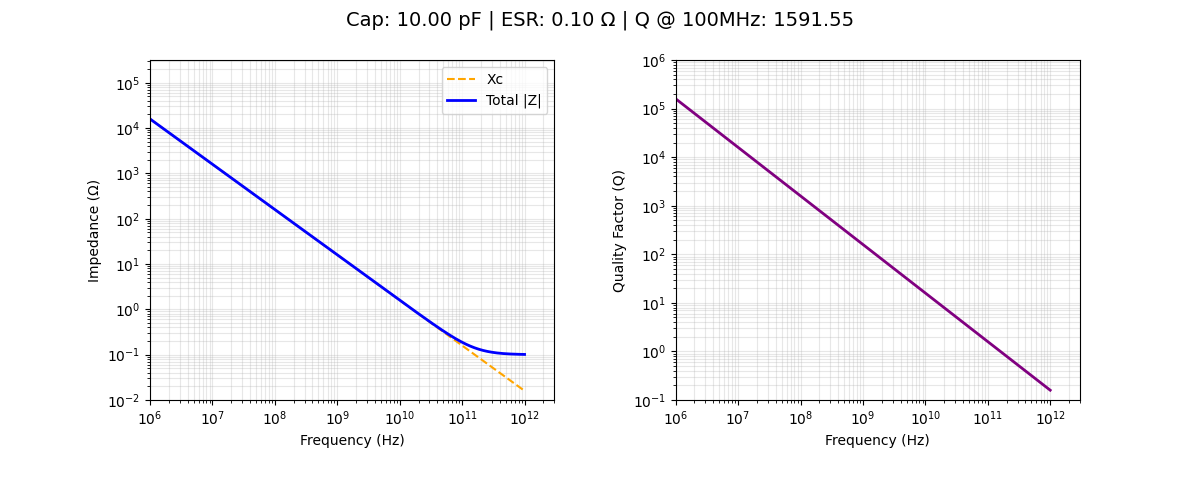

In [4]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets

plt.close('all')

# 1. Setup Figure with side-by-side (parallel) subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
plt.subplots_adjust(wspace=0.3, bottom=0.2)

# Subplot 1: Impedance (Left)
line_xc, = ax1.loglog([], [], color='orange', ls='--', lw=1.5, label='Xc')
line_total, = ax1.loglog([], [], color='blue', lw=2, label='Total |Z|')
v_line1 = ax1.axvline(1, color='gray', lw=0.5, ls='-', visible=False)
ax1.set_xlabel("Frequency (Hz)")
ax1.set_ylabel("Impedance (Ω)")
ax1.grid(True, which="both", ls="-", alpha=0.3)
ax1.legend()

# Subplot 2: Q Factor (Right)
line_q, = ax2.loglog([], [], color='purple', lw=2, label='Q Factor')
v_line2 = ax2.axvline(1, color='gray', lw=0.5, ls='-', visible=False)
ax2.set_xlabel("Frequency (Hz)")
ax2.set_ylabel("Quality Factor (Q)")
ax2.grid(True, which="both", ls="-", alpha=0.3)

# Floating text box for synchronized data
text_box = fig.text(0.5, 0.02, '', ha='center', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Global data storage - Increased frequency range for pF capacitors (up to 3GHz)
freq_data = np.logspace(5, 12, 2500) 
mag_data = np.zeros_like(freq_data)
xc_data = np.zeros_like(freq_data)
q_data = np.zeros_like(freq_data)

def update_cap(C_pF, ESR_ohms):
    global mag_data, xc_data, q_data
    if C_pF <= 0 or ESR_ohms <= 0: return
    
    C = C_pF * 1e-12
    omega = 2 * np.pi * freq_data
    
    # Physics calculations
    xc_data = 1 / (omega * C)
    mag_data = np.sqrt(ESR_ohms**2 + xc_data**2)
    q_data = xc_data / ESR_ohms 

    # Update Visuals
    line_xc.set_data(freq_data, xc_data)
    line_total.set_data(freq_data, mag_data)
    line_q.set_data(freq_data, q_data)
    
    ax1.set_xlim(1e6, 3e12) # Adjusted for high-frequency pF behavior
    ax1.set_ylim(max(1e-3, ESR_ohms * 0.1), max(xc_data[0], 100) * 2)
    ax2.set_xlim(1e6, 3e12)
    ax2.set_ylim(0.1, 1e6)
    
    # Calculation for Q @ 100MHz (More relevant for pF caps)
    idx_100mhz = (np.abs(freq_data - 100e6)).argmin()
    q_100mhz = q_data[idx_100mhz]
    
    # Update title with two decimal precision
    fig.suptitle(f"Cap: {C_pF:.2f} pF | ESR: {ESR_ohms:.2f} Ω | Q @ 100MHz: {q_100mhz:.2f}", fontsize=14)
    fig.canvas.draw_idle()

# Dual-cursor Logic
def on_mouse_move(event):
    if event.inaxes in [ax1, ax2]:
        idx = (np.abs(np.log10(freq_data) - np.log10(event.xdata))).argmin()
        
        f_hz = freq_data[idx]
        f_Ghz = f_hz / 1000000000.0
        xc, z, q = xc_data[idx], mag_data[idx], q_data[idx]
        
        v_line1.set_xdata([f_hz, f_hz]); v_line1.set_visible(True)
        v_line2.set_xdata([f_hz, f_hz]); v_line2.set_visible(True)
        
        text_box.set_text(f'Freq: {f_Ghz:.2f} GHz | Xc: {xc:.2f} Ω | Total Z: {z:.2f} Ω | Q: {q:.2f}')
        fig.canvas.draw_idle()

fig.canvas.mpl_connect('motion_notify_event', on_mouse_move)

# Sliders set to pF range
widgets.interact(update_cap, 
    C_pF=widgets.FloatSlider(value=10.0, min=0.5, max=1000.0, step=0.1, description='C (pF)'),
    ESR_ohms=widgets.FloatSlider(value=0.1, min=0.001, max=5.0, step=0.01, description='ESR (Ω)')
)
plt.show()


# 4. Inductor

## 4.1. Inductive Reactance ($X_L$)

This is the opposition to alternating current due to the inductor's magnetic field. It increases as frequency ($f$) goes up:

$$
X_L = 2\pi f L
$$

---

## 4.2. Series Resistance ($R_s$)

This is typically the DC Resistance (DCR) of the wire windings. It acts as a floor for the total impedance at low frequencies.

---

## 4.3. Total Impedance ($|Z|$)

The vector sum of the resistance and the reactance:

$$
|Z| = \sqrt{R_s^2 + X_L^2}
$$

- At low frequencies, $|Z|$ is flat and equal to $R_s$.
- At high frequencies, it follows $X_L$.

---

## Quality Factor ($Q$)

This represents the ratio of energy stored to energy lost. For an inductor:

$$
Q = \frac{X_L}{R_s}
$$

Because $X_L$ grows with frequency, the $Q$ factor of an inductor increases as frequency rises (until parasitic capacitance eventually takes over).


interactive(children=(FloatSlider(value=10.0, description='L (nH)', max=500.0, min=0.1), FloatSlider(value=0.5…

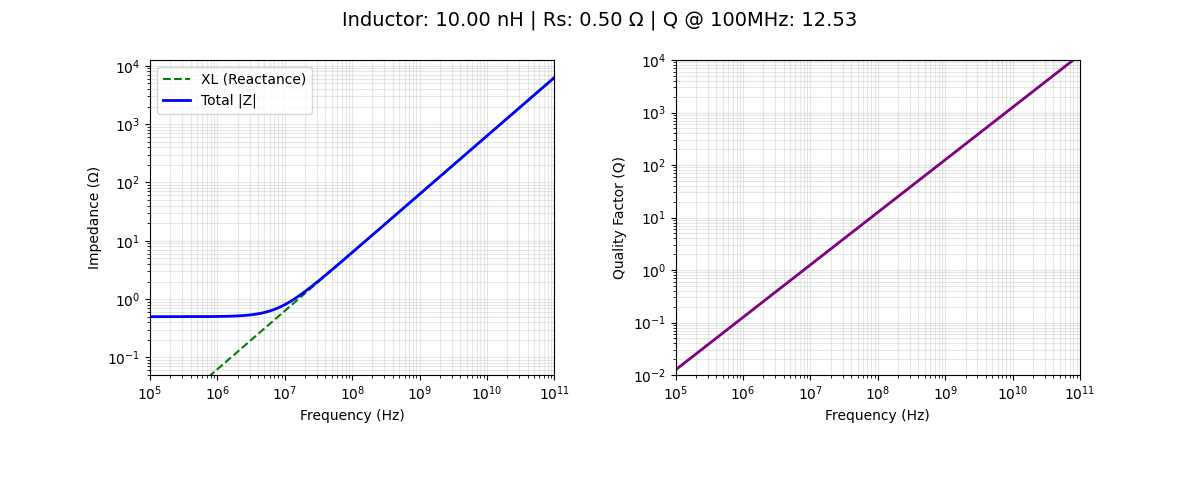

In [5]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets

plt.close('all')

# 1. Setup Figure with side-by-side (parallel) subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
plt.subplots_adjust(wspace=0.3, bottom=0.25)

# Subplot 1: Impedance (Left)
line_xl, = ax1.loglog([], [], color='green', ls='--', lw=1.5, label='XL (Reactance)')
line_total, = ax1.loglog([], [], color='blue', lw=2, label='Total |Z|')
v_line1 = ax1.axvline(1, color='gray', lw=0.5, ls='-', visible=False)
ax1.set_xlabel("Frequency (Hz)")
ax1.set_ylabel("Impedance (Ω)")
ax1.grid(True, which="both", ls="-", alpha=0.3)
ax1.legend()

# Subplot 2: Q Factor (Right)
line_q, = ax2.loglog([], [], color='purple', lw=2, label='Q Factor')
v_line2 = ax2.axvline(1, color='gray', lw=0.5, ls='-', visible=False)
ax2.set_xlabel("Frequency (Hz)")
ax2.set_ylabel("Quality Factor (Q)")
ax2.grid(True, which="both", ls="-", alpha=0.3)

# Floating text box for synchronized data
text_box = fig.text(0.5, 0.02, '', ha='center', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Global data storage - Extended to 10GHz for nH inductors
freq_data = np.logspace(5, 11, 2500) 
mag_data = np.zeros_like(freq_data)
xl_data = np.zeros_like(freq_data)
q_data = np.zeros_like(freq_data)

def update_ind(L_nH, Rs_ohms):
    global mag_data, xl_data, q_data
    if L_nH <= 0 or Rs_ohms <= 0: return
    
    L = L_nH * 1e-9
    omega = 2 * np.pi * freq_data
    
    # Physics calculations
    xl_data = omega * L
    mag_data = np.sqrt(Rs_ohms**2 + xl_data**2)
    q_data = xl_data / Rs_ohms 

    # Update Visuals
    line_xl.set_data(freq_data, xl_data)
    line_total.set_data(freq_data, mag_data)
    line_q.set_data(freq_data, q_data)
    
    ax1.set_xlim(1e5, 1e11)
    ax1.set_ylim(max(1e-3, Rs_ohms * 0.1), max(xl_data[-1], 100) * 2)
    ax2.set_xlim(1e5, 1e11)
    ax2.set_ylim(0.01, 1e4)
    
    # Calculation for Q @ 100MHz (Typical for RF nH inductors)
    idx_ref = (np.abs(freq_data - 100e6)).argmin()
    q_ref = q_data[idx_ref]
    
    fig.suptitle(f"Inductor: {L_nH:.2f} nH | Rs: {Rs_ohms:.2f} Ω | Q @ 100MHz: {q_ref:.2f}", fontsize=14)
    fig.canvas.draw_idle()

# Dual-cursor Logic
def on_mouse_move(event):
    if event.inaxes in [ax1, ax2]:
        idx = (np.abs(np.log10(freq_data) - np.log10(event.xdata))).argmin()
        
        f_hz = freq_data[idx]
        f_khz = f_hz / 1000000000.0
        xl, z, q = xl_data[idx], mag_data[idx], q_data[idx]
        
        v_line1.set_xdata([f_hz, f_hz]); v_line1.set_visible(True)
        v_line2.set_xdata([f_hz, f_hz]); v_line2.set_visible(True)
        
        text_box.set_text(f'Freq: {f_khz:.2f} GHz | XL: {xl:.2f} Ω | Total Z: {z:.2f} Ω | Q: {q:.2f}')
        fig.canvas.draw_idle()

fig.canvas.mpl_connect('motion_notify_event', on_mouse_move)

# Sliders - Switched to nH and adjusted Rs range
widgets.interact(update_ind, 
    L_nH=widgets.FloatSlider(value=10.0, min=0.1, max=500.0, step=0.1, description='L (nH)'),
    Rs_ohms=widgets.FloatSlider(value=0.5, min=0.01, max=10.0, step=0.01, description='Rs (Ω)')
)
plt.show()